# Imports

In [1]:
# General Imports
import numpy as np
import pandas as pd
import pickle
import os

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.simplefilter(action = 'ignore')

# Sommaire
#!pip install jyquickhelper
from jyquickhelper import add_notebook_menu # attention, ne prend que les titres de niveau 2
add_notebook_menu()

In [2]:
# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)
pd.set_option('display.precision', 5)

In [3]:
# à run pour colab uniquement
#from google.colab import drive
#drive.mount('/content/drive')

# Import des données

## Import

In [3]:
# import des données

# Chemin d'accès aux données (à modifier si code en local)
#path = '/content/drive/MyDrive/OpenClassrooms/Projet5/' #-> pour colab
path = '' #-> en local

filepath = os.path.join(path, 'df')

with open(filepath, 'rb') as f:
    df = pickle.load(f)

df.head()

,order_item_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,Count,review_time,order_time,delivery_error_time,order_preparation_time,shipping_limit_respect,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,review,distance,customer_city,customer_state,order_status,payment_type,product_category_,product_category_Electronics and Technology,product_category_Fashion and Accessories,product_category_Furniture and Home Decor,product_category_Leisure and Miscellaneous
0,1.39528,1.06303,-0.70040,-0.11360,0.05134,-0.13044,-0.70900,-0.09601,0.68586,-0.27741,-0.22248,1.36738,0.78108,0.75614,-0.53095,1.54254,0.12966,1.67612,1.17622,-0.33171,0.20950,0,0,1,1,0,0,0,1,0
1,-0.29029,-0.61370,0.29287,-0.11360,-0.29139,-0.13044,-0.70900,-0.55278,-0.92014,-0.27741,0.04272,0.14300,-0.11657,0.98629,-0.75761,1.23142,1.66459,1.56028,0.60983,-0.33171,0.02066,0,0,1,1,0,0,0,0,1
2,-0.29029,0.32946,-0.37099,-0.73142,-0.56494,-0.13044,0.08583,-0.65354,0.68586,-0.27741,-0.03875,-0.39753,-3.23460,0.08886,1.01142,-0.32421,-1.40528,-0.98817,-2.78849,2.65422,-0.07102,0,0,1,1,0,0,0,0,1
3,-0.29029,-2.39522,1.18867,-0.73142,-0.23414,-0.13044,2.07291,-0.06261,-0.11714,-0.27741,0.20993,-1.02482,-0.67837,-0.62902,0.54607,0.60917,1.66459,1.32861,1.17622,-0.33171,-0.10380,0,0,1,1,0,1,0,0,0
4,-0.29029,0.43426,2.93488,-0.73142,-0.60470,-0.13044,-0.70900,-0.72670,0.68586,-0.27741,-0.28311,-0.04300,-1.96742,0.77196,-1.19216,-1.56871,0.12966,-1.21984,-0.33415,-0.33171,-1.11828,0,0,1,1,0,1,0,0,0


# Jeu de données complet

In [4]:
df.columns

Index(['order_item_id', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_score', 'Count',
       'review_time', 'order_time', 'delivery_error_time',
       'order_preparation_time', 'shipping_limit_respect', 'purchase_month',
       'purchase_dayofweek', 'purchase_day', 'purchase_hour', 'review',
       'distance', 'customer_city', 'customer_state', 'order_status',
       'payment_type', 'product_category_',
       'product_category_Electronics and Technology',
       'product_category_Fashion and Accessories',
       'product_category_Furniture and Home Decor',
       'product_category_Leisure and Miscellaneous'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87099 entries, 0 to 87098
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   order_item_id                                87099 non-null  float64
 1   product_name_lenght                          87099 non-null  float64
 2   product_description_lenght                   87099 non-null  float64
 3   product_photos_qty                           87099 non-null  float64
 4   product_weight_g                             87099 non-null  float64
 5   payment_sequential                           87099 non-null  float64
 6   payment_installments                         87099 non-null  float64
 7   payment_value                                87099 non-null  float64
 8   review_score                                 87099 non-null  float64
 9   Count                                        87099 non-null  float64
 10

In [6]:
df.reset_index(drop = True, inplace = True)

In [7]:
df

,order_item_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,Count,review_time,order_time,delivery_error_time,order_preparation_time,shipping_limit_respect,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,review,distance,customer_city,customer_state,order_status,payment_type,product_category_,product_category_Electronics and Technology,product_category_Fashion and Accessories,product_category_Furniture and Home Decor,product_category_Leisure and Miscellaneous
0,1.39528,1.06303,-0.70040,-0.11360,0.05134,-0.13044,-0.70900,-0.09601,0.68586,-0.27741,-0.22248,1.36738,0.78108,0.75614,-0.53095,1.54254,0.12966,1.67612,1.17622,-0.33171,0.20950,0,0,1,1,0,0,0,1,0
1,-0.29029,-0.61370,0.29287,-0.11360,-0.29139,-0.13044,-0.70900,-0.55278,-0.92014,-0.27741,0.04272,0.14300,-0.11657,0.98629,-0.75761,1.23142,1.66459,1.56028,0.60983,-0.33171,0.02066,0,0,1,1,0,0,0,0,1
2,-0.29029,0.32946,-0.37099,-0.73142,-0.56494,-0.13044,0.08583,-0.65354,0.68586,-0.27741,-0.03875,-0.39753,-3.23460,0.08886,1.01142,-0.32421,-1.40528,-0.98817,-2.78849,2.65422,-0.07102,0,0,1,1,0,0,0,0,1
3,-0.29029,-2.39522,1.18867,-0.73142,-0.23414,-0.13044,2.07291,-0.06261,-0.11714,-0.27741,0.20993,-1.02482,-0.67837,-0.62902,0.54607,0.60917,1.66459,1.32861,1.17622,-0.33171,-0.10380,0,0,1,1,0,1,0,0,0
4,-0.29029,0.43426,2.93488,-0.73142,-0.60470,-0.13044,-0.70900,-0.72670,0.68586,-0.27741,-0.28311,-0.04300,-1.96742,0.77196,-1.19216,-1.56871,0.12966,-1.21984,-0.33415,-0.33171,-1.11828,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87094,2.23807,-1.45206,-0.31721,-0.73142,0.30977,-0.13044,-0.31159,1.26897,-1.72314,0.95021,-0.25502,-1.01643,-0.55079,-0.39919,0.20671,-0.63533,-1.40528,1.67612,0.79863,5.64015,-0.76908,0,0,1,1,0,0,0,0,1
87095,-0.29029,0.64385,-1.17267,-0.73142,0.46881,-0.13044,-0.31159,-0.60127,0.68586,-0.27741,-0.01583,1.99506,-3.09752,0.96021,-0.31607,1.85367,0.64130,-0.06146,0.60983,-0.33171,3.68432,0,0,1,1,1,0,0,0,0
87096,-0.29029,0.01508,-1.07183,-0.73142,-0.38602,-0.13044,-0.31159,-0.57028,0.68586,-0.27741,-0.23191,-0.53905,0.87647,-0.41666,-0.21023,-0.32421,-1.40528,-0.98817,0.98742,2.65422,-0.38659,0,0,1,1,0,0,0,0,1
87097,-0.29029,-1.87124,-0.72057,-0.73142,-0.45719,-0.13044,0.88066,1.40077,-2.52614,-0.27741,-0.29430,0.14947,-0.38500,0.63110,-0.13753,-0.01308,0.12966,-0.06146,0.04344,-0.33171,0.37802,0,0,1,1,0,0,0,0,1


## Kmeans

In [20]:
# K Means Clustering
# = algo itératif qui fonctionne en 2 étapes :

# 1) on affecte les points du dataset au centroïde le plus proche
# 2) puis on calcule la moyenne de chaque cluster et on déplace chaque centroïde au centre de son cluster

# et ainsi de suite jusqu'à ce que les centroïdes convergent à une position d'équilibre

# selon la position initiale des centroïdes, l'algo k-means peut donner de mauvais clusters (converger vers de mauvaises positions)
# pour éviter ce pb, on execute algo plusieurs fois en modifiant les positions de départ/la position initiale du centroïde

# pour chaque résultat donné, on mesure la distance entre les points d'un cluster et le centre de ce dernier et on retient la solution pour laquelle la somme de ces distances
# est la plus petite

# en gros, cherche la position des centres qui minimise la distance entre les points d'un cluster et le centre de ce dernier
# équivaut plus ou moins à minimiser la variance des clusters

### K optimal

In [21]:
### Elbow method

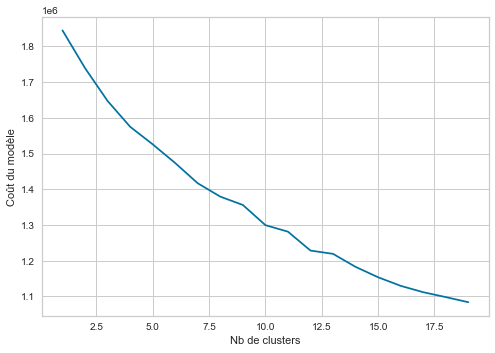

CPU times: user 5min 15s, sys: 2min 29s, total: 7min 44s
Wall time: 1min 3s


In [22]:
%%time
# Elbow method
# -> detecter une zone de coude dans la minimisation du coût (inertia)

inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters = k).fit(df)
    inertia.append(model.inertia_)

# plot le coude
plt.figure()
plt.plot(K_range, inertia)
plt.xlabel('Nb de clusters')
plt.ylabel('Coût du modèle')
plt.show()

In [23]:
# https://www.kaggle.com/code/mesofianeyou/customer-segmentation-with-k-means

In [24]:
### KElbowVisualizer

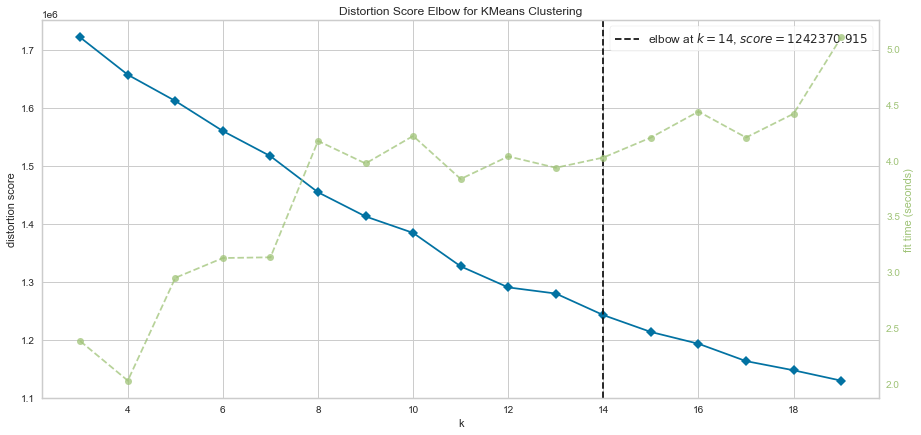

CPU times: user 6min 10s, sys: 2min 4s, total: 8min 14s
Wall time: 1min 7s


<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
%%time

# KElbowVisualizer - 'distortion' metric (default metric)
# Instantiate the clustering model and visualizer
model = KMeans()
d_visualizer = KElbowVisualizer(model, 
                                k = (3, 20), 
                                size = (1080, 500), 
                                metric = 'distortion')

# Fit the data to the visualizer
d_visualizer.fit(df)

# Finalize and render the figure
d_visualizer.show()

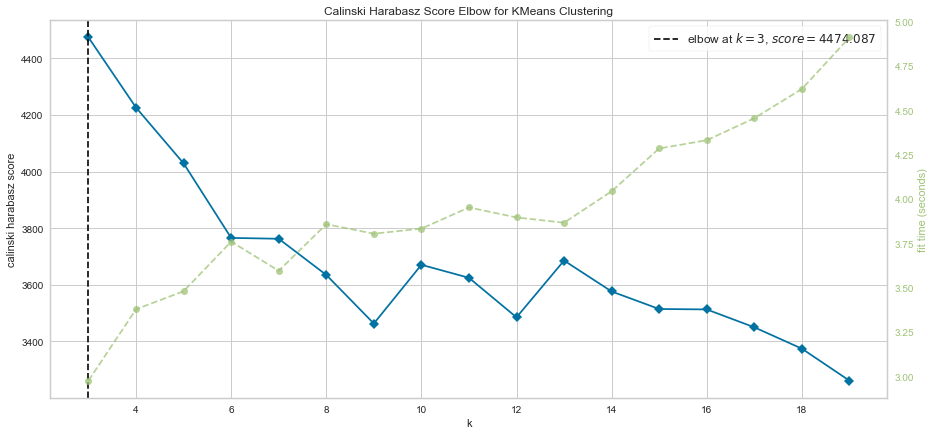

CPU times: user 6min 8s, sys: 2min 18s, total: 8min 26s
Wall time: 1min 9s


<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [9]:
%%time

# KElbowVisualizer - 'calinski_harabasz' metric
# Instantiate the clustering model and visualizer
model = KMeans()
ch_visualizer = KElbowVisualizer(model, 
                                 k = (3, 20), 
                                 size = (1080, 500), 
                                 metric = 'calinski_harabasz')

# Fit the data to the visualizer
ch_visualizer.fit(df)

# Finalize and render the figure
ch_visualizer.show()        

In [10]:
%%time

# KElbowVisualizer - 'silhouette' metric
# Instantiate the clustering model and visualizer
model = KMeans()
s_visualizer = KElbowVisualizer(model, 
                              k = (3, 20), 
                              size = (1080, 500), 
                              metric = 'silhouette')

# Fit the data to the visualizer
s_visualizer.fit(df) 

# Finalize and render the figure
s_visualizer.show()        

KeyboardInterrupt: 

<Figure size 1080x500 with 0 Axes>

In [28]:
# détecte le coude à un drole d'endroit... vérifier comment il fait

In [ ]:
# Comparer le k optimal des différentes métriques :

# distortion 
k_distortion = d_visualizer.elbow_value_
print(f'Nombre optimal de clusters - distortion metric : k = {k_distortion}')

# calinski harabasz
k_calinski_harabasz = ch_visualizer.elbow_value_
print(f'Nombre optimal de clusters - calinski harabasz metric : k = {k_calinski_harabasz}')

# silhouette
k_silhouette = s_visualizer.elbow_value_
print(f'Nombre optimal de clusters - silhouette metric : k = {k_silhouette}')

Nombre optimal de clusters - distortion metric : k = 14
Nombre optimal de clusters - calinski harabasz metric : k = 3
Nombre optimal de clusters - silhouette metric : k = 3


In [30]:
# Choisir le k optimal retenu : 

# compte tenu de notre cas et de notre problématique, 4 clusters ça me parait bien

k = 3

In [31]:
### Silhouette score

In [32]:
# Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of
# how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of
# clusters visually. This measure has a range of [-1, 1].

# Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters.
# A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values
# indicate that those samples might have been assigned to the wrong cluster.

# Silhoutte plots may be used to analyze the appropriateness of a chosen number of clusters for the given data, by bumping up the cluster
# count every time that you see a poorly fitted cluster. They are a heavier approach to cluster number selection than the elbow plot,
# but also tell you much more about the composition of the clusters themselves.

In [33]:
# Nb de points par 'blob'
# Regarder si un blob ( = cluster) à des données plus faiblement 'fittées'

# Silhouette Coefficient
# The silhouette coefficient measures the quality of clustering by computing the average distance between each data point and other points within the same cluster,
# relative to the distance between the data point and points in neighboring clusters. The coefficient ranges from -1 to +1, where a higher value indicates better clustering.

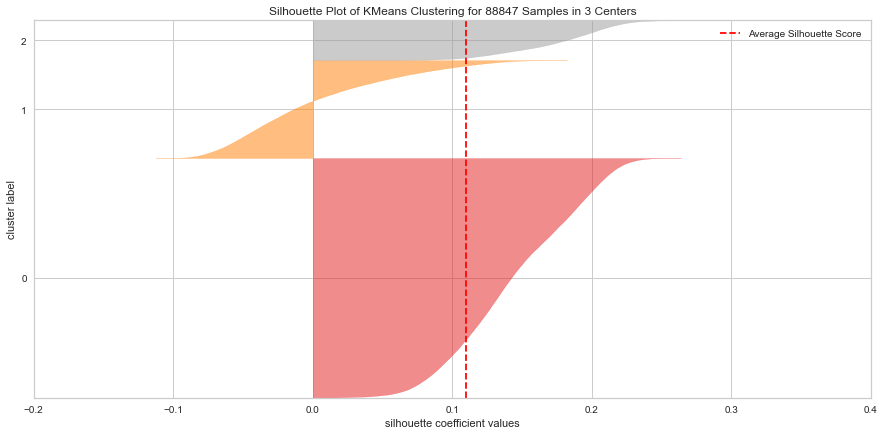

CPU times: user 5min 32s, sys: 1min 58s, total: 7min 30s
Wall time: 3min 6s


<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 88847 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
%%time

# Instantiate the clustering model and visualizer
kmeans1 = KMeans(n_clusters = k, init = 'k-means++', random_state = 42) 
visualizer = SilhouetteVisualizer(kmeans1, size = (1080, 500))

# Fit the data to the visualizer
visualizer.fit(df)

# Finalize and render the figure
visualizer.show()

In [35]:
# Interpretation

### Clustering

In [36]:
# Maintenant qu'on a notre k optimal -> on peut faire notre clustering avec Kmeans

In [37]:
%%time

# Instantiate the clustering model
model = KMeans(n_clusters = k # nb de clusters qu'on veut avoir
               #n_init = 10, # nb d'initialisations qu'on veut faire - 10 = valeur par défaut
               #max_iter = 300, # nb d'itérations max - par défaut 300
               #init = 'k-means++'' # quelle stratégie d'initialisation on utilise
               )

# K-Means++ -> méthode d'initialisation qui consiste à placer les centroïdes sur des points du dataset éloignés les uns des autres - facilite convergence

# Entrainer le modèle
model.fit(df) 
# model.labels_ ou
model.predict(df)

CPU times: user 12.1 s, sys: 8.27 s, total: 20.3 s
Wall time: 4.01 s


array([1, 0, 0, ..., 2, 1, 1], dtype=int32)

In [38]:
# Evaluation du clustering : silhouette score
silhouette_kmeans = round(silhouette_score(df, model.fit_predict(df)), 2)
print('The average silhouette score is:', silhouette_kmeans)

The average silhouette score is: 0.11


In [48]:
# A score closer to 1 indicates that the clustering is good, while a score closer to -1 indicates that the clustering is bad.

# 0.13... pas top

### Description des clusters

In [49]:
# Créer une copie du df pour ajouter les clusters
df_clusters = df

In [50]:
# Description des clusters obtenus

labels = model.labels_
df_clusters['cluster_num'] = labels
df_clusters.head()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_time,order_time,delivery_error_time,order_preparation_time,shipping_limit_respect,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,full_written_review,written_review_title,distance,order_status,payment_type,product_category_Electronics and Technology,product_category_Fashion and Accessories,product_category_Furniture and Home Decor,product_category_Leisure and Miscellaneous,cluster_num
0,-0.77904,0.54849,-0.70603,1.73278,-0.12925,-0.33947,-0.09498,-0.03169,0.18454,-0.39232,0.07997,1.10374,-0.63577,-0.31827,-0.89104,0.05171,0.04499,-0.84907,-0.3646,-0.55255,1,1.0,0,0,1,0,3
1,-0.57858,0.33427,0.46264,2.11981,-0.12925,1.82064,0.61434,0.69639,0.90602,0.44313,0.38591,-0.00349,-0.02643,-1.55593,0.63880,-0.41016,0.98383,-0.84907,-0.3646,-0.37934,1,1.0,0,0,1,0,1
2,0.62418,0.26183,-0.70603,1.62303,-0.12925,1.46063,-0.05414,0.69639,-0.27197,1.44528,1.29965,5.32492,-1.42192,-0.31827,1.14875,0.39812,0.23275,-0.84907,-0.3646,-1.02037,1,1.0,0,0,1,0,0
3,-0.07743,0.43290,-0.70603,2.65009,-0.12925,-0.69948,0.00442,0.69639,0.16753,0.26609,-0.09560,3.18031,-0.55526,-0.93710,-0.89104,-0.29469,0.23275,-0.84907,-0.3646,-1.04622,1,1.0,0,0,1,0,3
4,1.22557,-0.58272,-0.70603,0.81389,-0.12925,1.82064,0.30133,0.69639,0.40517,-0.11039,0.61814,-0.45935,-0.39031,0.30056,1.65870,1.55280,-1.08163,1.17776,2.7427,-0.64941,1,1.0,0,0,0,0,2


In [51]:
# Faire la moyenne pour expliquer les clusters
df_clusters.groupby('cluster_num').mean().reset_index(drop = True)

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_time,order_time,delivery_error_time,order_preparation_time,shipping_limit_respect,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,full_written_review,written_review_title,distance,order_status,payment_type,product_category_Electronics and Technology,product_category_Fashion and Accessories,product_category_Furniture and Home Decor,product_category_Leisure and Miscellaneous
0,-0.04034,-0.01202,-0.08457,0.06464,-0.04286,-0.06174,0.00127,-1.26036,-0.02055,1.93035,1.45959,1.20857,-0.51850,-0.11165,0.02498,0.00763,-0.02402,0.42323,-0.22011,0.57703,0.98402,0.73961,0.11120,0.01777,0.27229,0.55071
1,0.06835,0.23746,0.05010,0.96927,-0.09084,1.54604,0.92860,-0.01418,-0.00070,-0.03997,-0.24761,0.03732,0.05434,0.04287,0.05748,-0.00293,0.02160,0.02839,-0.30123,0.18555,0.98391,0.72953,0.10746,0.02045,0.27002,0.54956
2,0.05556,0.01748,0.01138,-0.10594,-0.05763,-0.03380,-0.04059,-0.06407,0.03094,-0.31922,-0.15803,-0.22005,0.00073,0.01223,-0.03541,-0.01507,-0.03164,0.88891,2.74270,-0.02190,0.98227,0.73992,0.10408,0.02024,0.27106,0.55467
3,-0.01992,-0.05925,-0.00078,-0.22940,0.03899,-0.36301,-0.22063,0.21527,-0.00189,-0.24257,-0.14455,-0.16363,0.06915,0.00515,-0.01199,0.00210,0.00399,-0.22780,-0.36460,-0.13361,0.98258,0.73868,0.10950,0.01989,0.27258,0.55004


In [52]:
# Moyenne -> pas vraiment pertinent pour expliquer certaines variables
# ex -> type de paiement, jour d'achat etc... 

In [53]:
df_clusters.columns

Index(['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_score', 'review_time',
       'order_time', 'delivery_error_time', 'order_preparation_time',
       'shipping_limit_respect', 'purchase_month', 'purchase_dayofweek',
       'purchase_day', 'purchase_hour', 'full_written_review',
       'written_review_title', 'distance', 'order_status', 'payment_type',
       'product_category_Electronics and Technology',
       'product_category_Fashion and Accessories',
       'product_category_Furniture and Home Decor',
       'product_category_Leisure and Miscellaneous', 'cluster_num'],
      dtype='object')

In [57]:
df_clusters['payment_type'].value_counts().index[0]

1.0

In [62]:
def get_most_common(i):
    return df_clusters[i].value_counts().index[0]

df_clusters.groupby('cluster_num').agg({
    'product_name_lenght': 'mean', 
    'product_description_lenght': 'mean',
    'product_photos_qty': 'mean', 
    'product_weight_g': 'mean', 
    'payment_sequential': 'mean',
    'payment_installments': 'mean', 
    'payment_value': 'mean', 
    'review_score': 'mean', 
    'review_time': 'mean',
    'order_time': 'mean', 
    'delivery_error_time': 'mean', 
    'order_preparation_time': 'mean',
    'shipping_limit_respect': get_most_common('shipping_limit_respect'), 
    'purchase_month' : get_most_common('purchase_month'), 
    'purchase_dayofweek' : get_most_common('purchase_dayofweek'),
    'purchase_day' : get_most_common('purchase_day'), 
    'purchase_hour' : get_most_common('purchase_hour'), 
    'full_written_review' : get_most_common('full_written_review'),
    'written_review_title' : get_most_common('written_review_title'), 
    'distance': 'mean', 
    'order_status' : get_most_common('order_status'), 
    'payment_type' : get_most_common('payment_type'),
    'product_category_Electronics and Technology' : get_most_common('product_category_Electronics and Technology'),
    'product_category_Fashion and Accessories' : get_most_common('product_category_Fashion and Accessories'),
    'product_category_Furniture and Home Decor' : get_most_common('product_category_Furniture and Home Decor'),
    'product_category_Leisure and Miscellaneous' : get_most_common('product_category_Leisure and Miscellaneous')
})

TypeError: 'numpy.float64' object is not callable

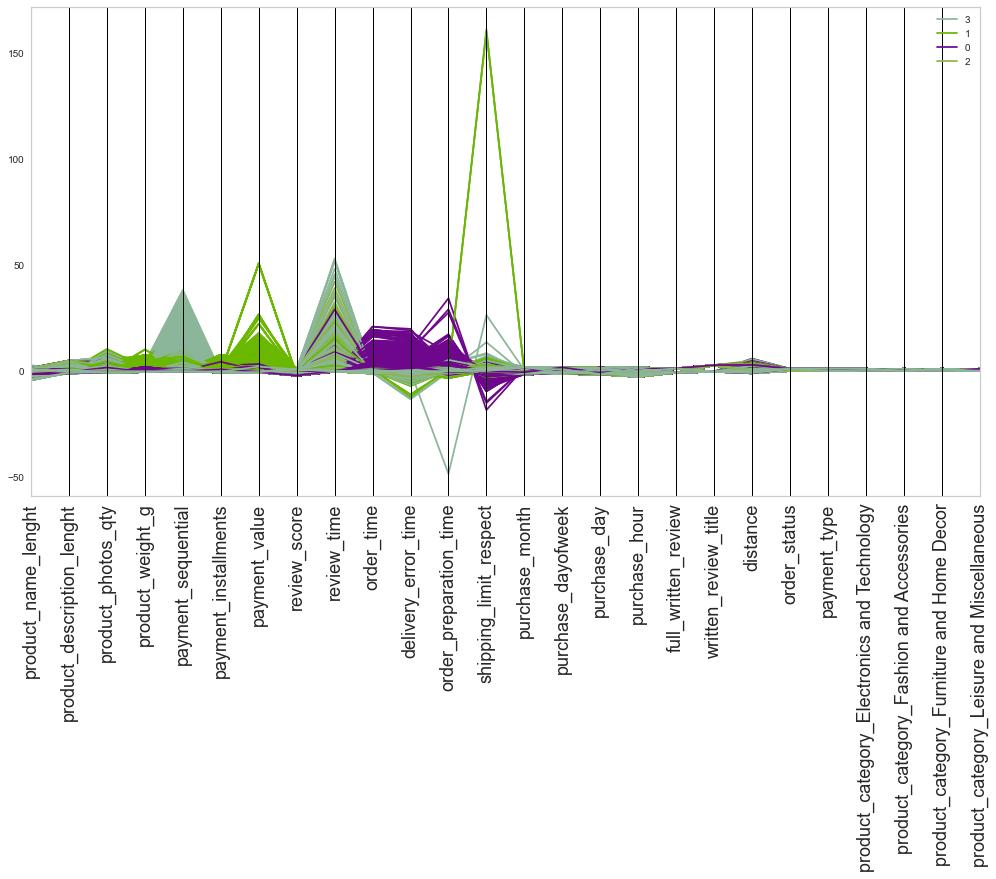

In [64]:
# pd.plotting.parallel_coordinates
# https://www.data-to-viz.com/graph/parallel.html

plt.figure(figsize = (17, 9))
pd.plotting.parallel_coordinates(df_clusters, 'cluster_num')
plt.xticks(fontsize = 18, rotation = 90)
plt.show()

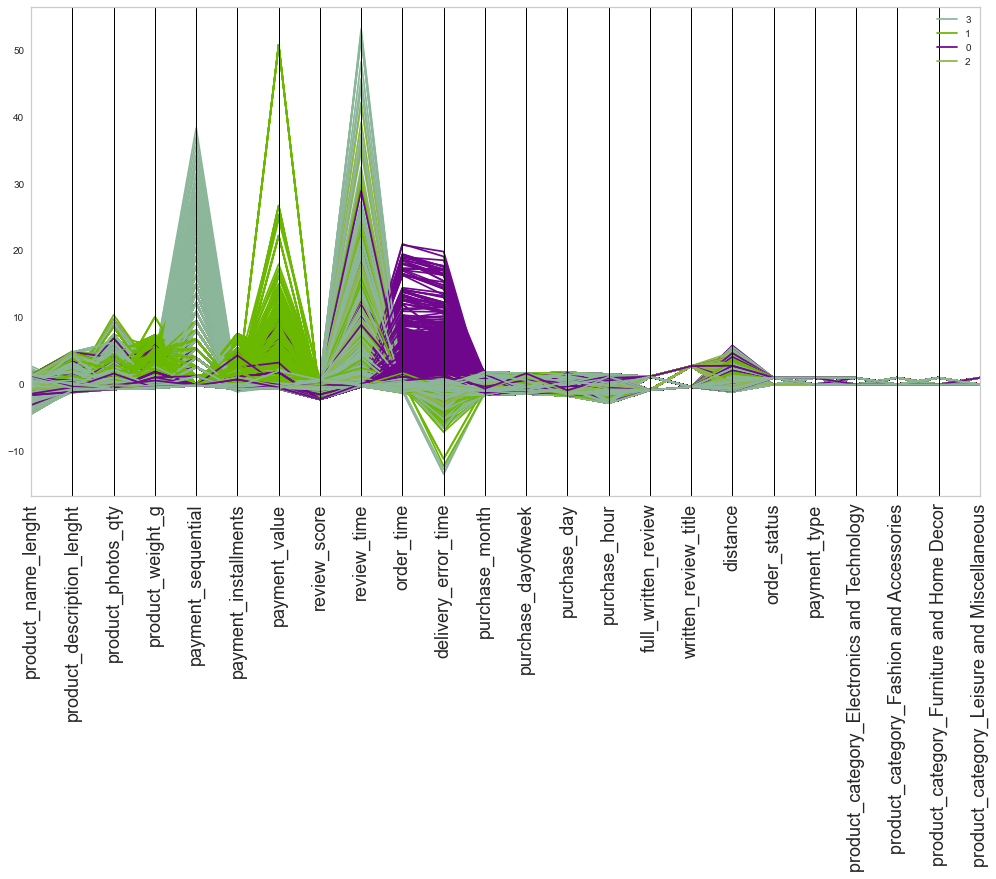

In [66]:
plt.figure(figsize = (17, 9))
pd.plotting.parallel_coordinates(df_clusters.drop(['shipping_limit_respect', 'order_preparation_time'], axis = 1), 'cluster_num')
plt.xticks(fontsize = 18, rotation = 90)
plt.show()

In [ ]:
# Interprétation

# each feature is now represented in its own axis, data points appear to be connected through lines. 
# If these lines are parallel, it means that the relationship between these variables is positive. 
# Otherwise, they have a negative relationship

In [ ]:
%%time

# Pairplot
plt.figure()
sns.pairplot(df_clusters, hue = 'cluster_num')
plt.show()

In [ ]:
# Idées de graphs
# https://echarts.apache.org/examples/en/index.html#chart-type-line

In [ ]:
# position des centroïdes
# model.cluster_centers_

# model.inertia_ -> somme des distances au centroïdes
# model.score(X) -> idem mais exprimé de manière négative

In [ ]:
# autres algo testés:
# - DBSCAN
# - AgglomerativeClustering
# - Spectral Clustering


# impossibles à faire tourner avec jeu de données complet (plante) 
# tentative avec jeu de données réduit

array([[ 0.05827626, -0.31486235, -1.29827343, ..., -0.04543325,
        -0.01572553, -0.01375453],
       [-1.53007631,  1.50316634, -1.9723962 , ..., -0.04459014,
        -0.01542781, -0.01517581],
       [-4.35156701, -1.19684997, -2.7500482 , ..., -0.05204329,
        -0.01563465, -0.0150612 ],
       ...,
       [-4.109969  , -0.07391125,  2.97596951, ..., -0.01498125,
        -0.01710695, -0.00774281],
       [ 0.60544555,  0.51076256, -1.32571743, ..., -0.13395976,
        -0.01890557, -0.03587644],
       [ 1.38368193, -0.36467336,  0.72175578, ..., -0.04359922,
        -0.01608276, -0.01071622]])

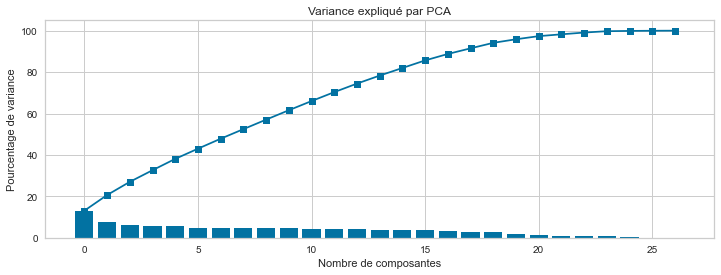

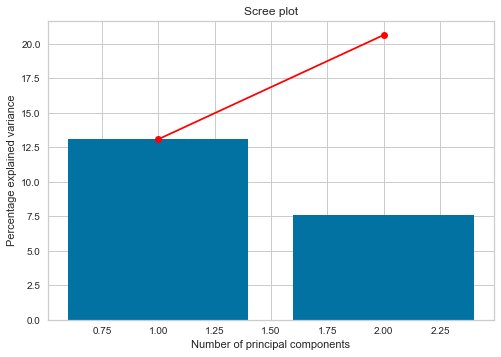

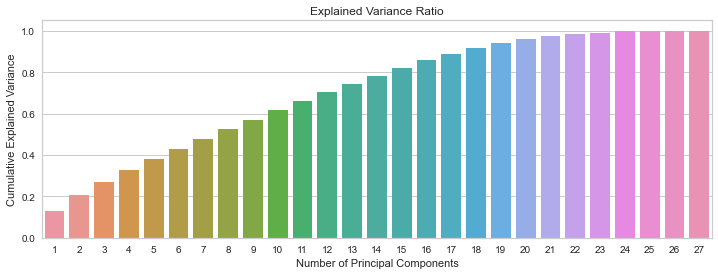

array([0.13074447, 0.07554177, 0.0637826 , 0.05609704, 0.05480799,
       0.04911342, 0.04818623, 0.04620638, 0.04590438, 0.04537626,
       0.04432309, 0.04311672, 0.04119606, 0.03866996, 0.0367079 ,
       0.03656886, 0.03108659, 0.02722264, 0.02656394, 0.01723032,
       0.01507806, 0.0088722 , 0.00843669, 0.00658845, 0.00137169,
       0.00076777, 0.00043852])

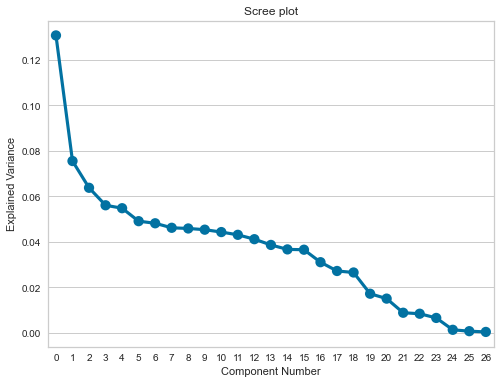

Explained variance regarding first dimension : 13.1%
Explained variance regarding second dimension : 7.6%
Total variance included in those 2 dimensions : 20.6%


In [ ]:
# nuuuuuul

(116464, 18)

In [ ]:
# 18 variables...

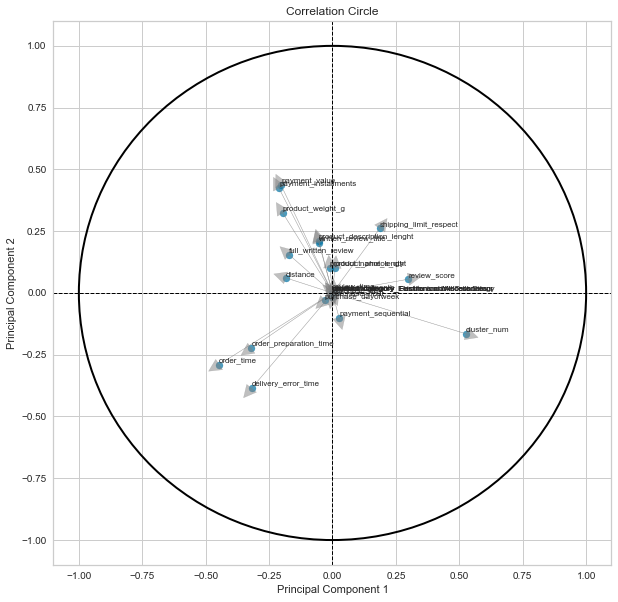

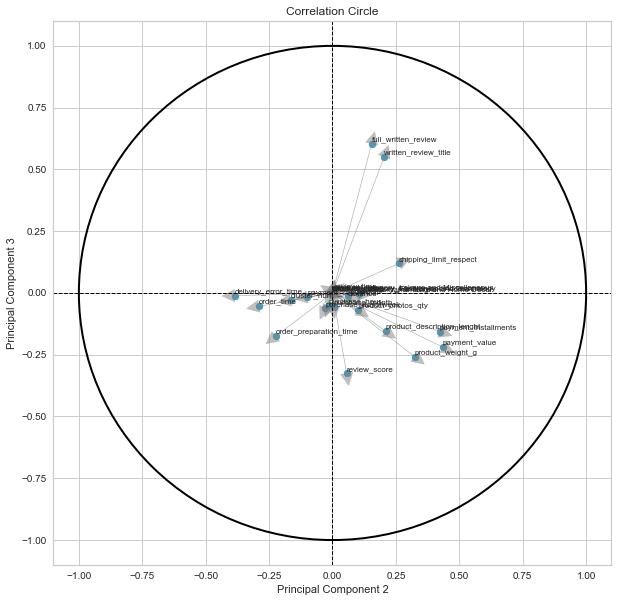

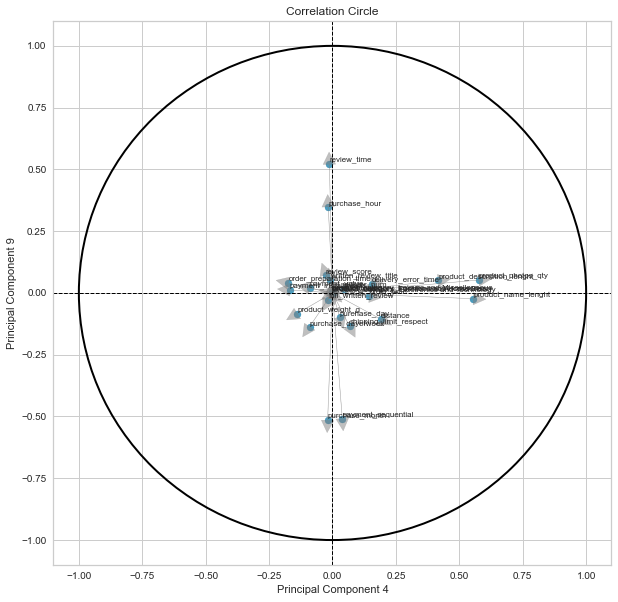